In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

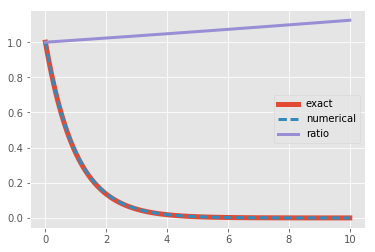

In [6]:

dt,tmin,tmax = .1, 0.0, 10.0
steps = int((tmax - tmin) / dt)

t = np.linspace(tmin, tmax, steps)
y = np.zeros(steps)

ya = np.exp(-t)
y[0] = 1.0 #initial condition

#Euler
#for i in range(steps - 1):
#    y[i+1] = y[i] - dt*y[i]

#Runge-Katta 2nd Order
y1 = np.zeros(steps)
for i in range(steps-1):
    y1[i]=y[i]-0.5*dt*y[i]
    y[i+1]=y[i]-dt*y1[i]
    
plt.plot(t, ya, lw=5, label='exact')
plt.plot(t, y, ls='--', lw=3, label='numerical')
plt.plot(t, y/ya, lw=3, label='ratio')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


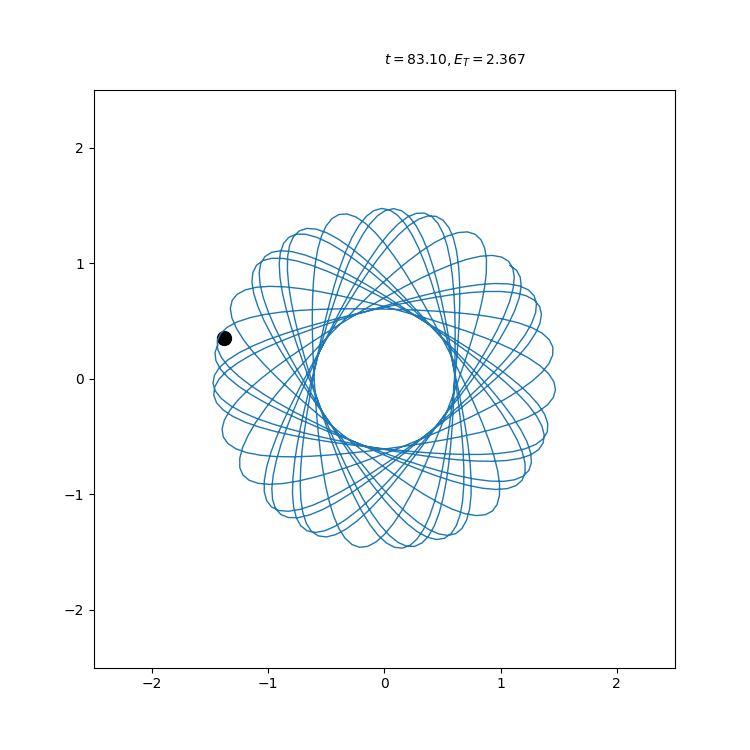

In [3]:
% matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dim = 2
nums = 1000

R = np.zeros(dim) #position
V = np.zeros(dim) #velocity

Rs = np.zeros([dim, nums]) #position at all steps
Vs = np.zeros([dim, nums]) #velocity at all steps

Et = np.zeros(nums) #total energy at all steps
time = np.zeros(nums) #time at all steps

def init():
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles, line, title

def animate(i):
    global R, V, F, Rs, Vs, time, Et
    V = V * (1-zeta/m*dt) - k/m*dt*R*np.linalg.norm(R)**2
    R = R + V*dt
    Vs[0:dim, i] = V
    Rs[0:dim, i] = R
    time[i] = i*dt
    Et[i] = .5*m*np.linalg.norm(V)**2 + .5*k*np.linalg.norm(R)**4
    particles.set_data(R[0], R[1]) #current position
    line.set_data(Rs[0, 0:i], Rs[1, 0:i]) #add latest position Rs
    title.set_text(r'$t = {0:.2f},E_T = {1:.3f}$'.format(i*dt, Et[i]))
    return particles,line,title

#system params
m, k, zeta = 1.0, 1.0, 0.
R[0], R[1] = 1., 1.
V[0], V[1] = 1., 0.
dt = .1*np.sqrt(k/m)
box = 5

#plots
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax = plt.axes(xlim=(-box/2,box/2), ylim=(-box/2,box/2))
particles, = ax.plot([],[],'ko',ms=10) #particle plot
line,=ax.plot([],[],lw=1) #trajectory plot
title=ax.text(.5,1.05,r'',transform=ax.transAxes,va='center')
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=nums,interval=5,blit=True,repeat=False) #draw

#anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


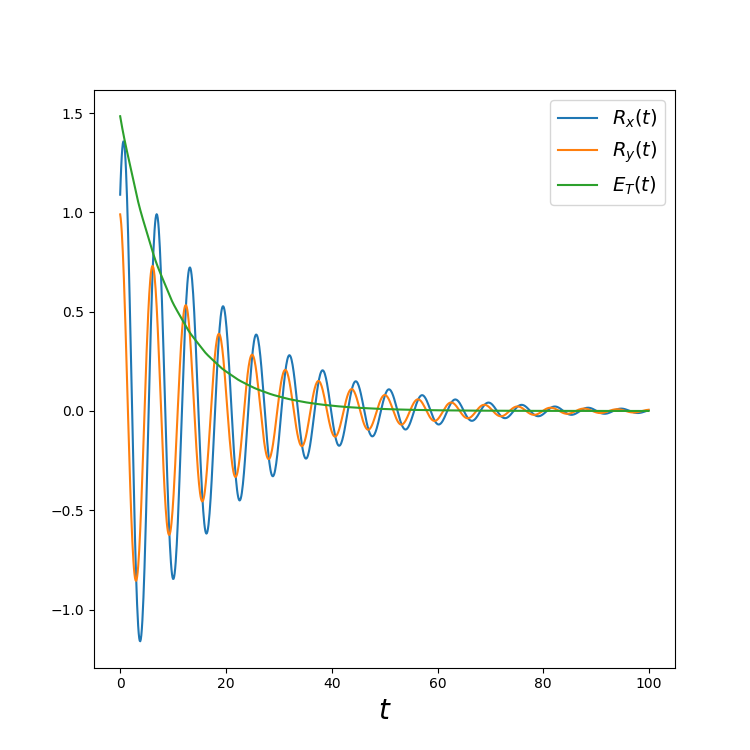

In [2]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


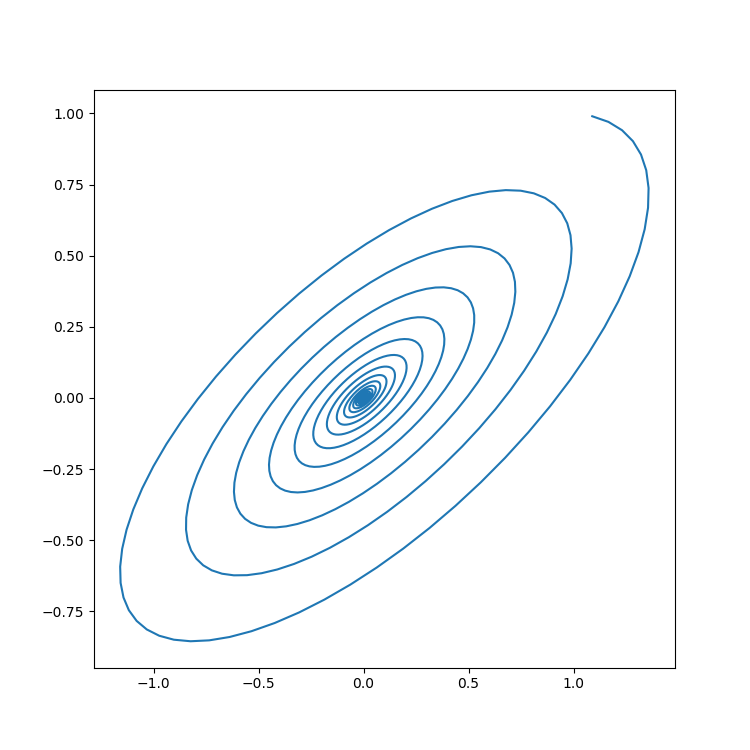

In [3]:
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax.plot(Rs[0,0:nums],Rs[1,0:nums])
#parameteric plot Rx(t) vs. Ry(t)
plt.show()

<IPython.core.display.Javascript object>


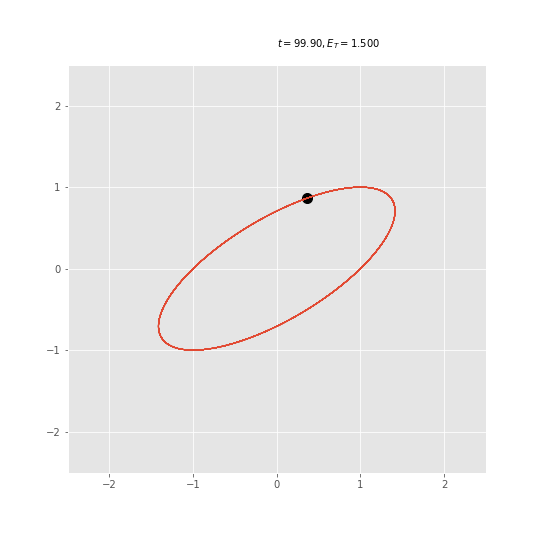

In [11]:
#Runge-Katta 4th Ordre

% matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dim = 2
nums = 1000

R = np.zeros(dim) #position
V = np.zeros(dim) #velocity

Rs = np.zeros([dim, nums]) #position at all steps
Vs = np.zeros([dim, nums]) #velocity at all steps

Et = np.zeros(nums) #total energy at all steps
time = np.zeros(nums) #time at all steps

def init():
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles, line, title

R1    = np.zeros(dim)
V1    = np.zeros(dim)
R2    = np.zeros(dim)
V2    = np.zeros(dim)
R3    = np.zeros(dim)
V3    = np.zeros(dim)
R4    = np.zeros(dim)
V4    = np.zeros(dim)
def animate(i):
    global R,V,F,Rs,Vs,time,Et
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R
    R1 = R + V*0.5*dt
    V2 = V - zeta/m*0.5*dt*V1 - k/m*0.5*dt*R1
    R2 = R + V1*0.5*dt
    V3 = V - zeta/m*dt*V2 - k/m*dt*R2
    R3 = R + V2*dt
    V4 = V - (V+V1*2+V2*2+V3)/6.*zeta/m*dt - k/m*dt*(R+R1*2+R2*2+R3)/6.
    R4 = R + (V+V1*2+V2*2+V3)/6.*dt 
    R  = R4
    V  = V4
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])
    line.set_data(Rs[0,0:i], Rs[1,0:i])
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

#system params
m, k, zeta = 1.0, 1.0, 0.
R[0], R[1] = 1., 1.
V[0], V[1] = 1., 0.
dt = .1*np.sqrt(k/m)
box = 5

#plots
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax = plt.axes(xlim=(-box/2,box/2), ylim=(-box/2,box/2))
particles, = ax.plot([],[],'ko',ms=10) #particle plot
line,=ax.plot([],[],lw=1) #trajectory plot
title=ax.text(.5,1.05,r'',transform=ax.transAxes,va='center')
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=nums,interval=5,blit=True,repeat=False) #draw

#anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


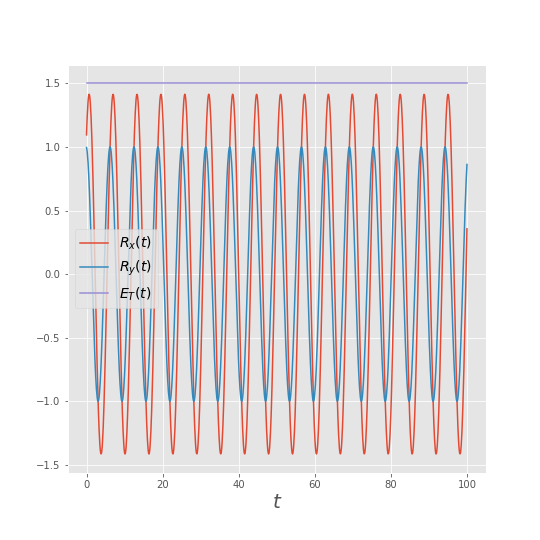

In [12]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,Rs[0]) # plot R_x(t)
ax.plot(time,Rs[1]) # plot R_y(t)
ax.plot(time,Et) # plot E(t) (ideally constant if \deta=0)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_T(t)$'], fontsize=14)
plt.show()